In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("combined_file.csv")

In [3]:
df.head()

,Batting Team,Balling Team,venue,Match Date,Match Time,Over number,score after over,wickets after over,Inning score,Inning Wickets
0,CSK,MI,Wankhede Stadium,4/7/2018,14:30:00,19,159,9,169,9
1,CSK,MI,Wankhede Stadium,4/7/2018,14:30:00,18,139,8,169,9
2,CSK,MI,Wankhede Stadium,4/7/2018,14:30:00,17,119,8,169,9
3,CSK,MI,Wankhede Stadium,4/7/2018,14:30:00,16,115,7,169,9
4,CSK,MI,Wankhede Stadium,4/7/2018,14:30:00,15,106,7,169,9


In [4]:
df.rename(columns = {'venue' : 'Venue'}, inplace = 'True' )

In [5]:
df = df.drop(columns=['Match Time','Inning Wickets'], errors='ignore')

In [6]:
df1 = pd.read_csv("combined_crickinfo_data.csv")

In [7]:
df1.head(5)

,Batting Team,Balling Team,Venue,Match Date,Over number,Score after over,Wickets after over,Inning Score
0,CSK,RR,DY Patil,"June 01 2008,",1,6,0,163
1,CSK,RR,DY Patil,"June 01 2008,",2,12,0,163
2,CSK,RR,DY Patil,"June 01 2008,",3,16,0,163
3,CSK,RR,DY Patil,"June 01 2008,",4,29,0,163
4,CSK,RR,DY Patil,"June 01 2008,",5,39,0,163


In [8]:
df1.columns

Index(['Batting Team', 'Balling Team', 'Venue', 'Match Date', 'Over number',
       'Score after over', 'Wickets after over', 'Inning Score'],
      dtype='object')

In [9]:
print(df1['Match Date'].unique())

['June 01 2008,' 'May 31 2008,' 'May 30 2008,' 'May 28 2008,'
 'May 27 2008,' 'May 25 2008,' 'May 24 2008,' 'May 23 2008,'
 'May 21 2008,' 'May 20 2008,' 'May 19 2008,' 'May 18 2008,'
 'May 17 2008,' 'May 16 2008,' 'May 15 2008,' 'May 14 2008,'
 'May 13 2008,' 'May 12 2008,' 'May 11 2008,' 'May 10 2008,'
 'May 09 2008,' 'May 08 2008,' 'May 07 2008,' 'May 06 2008,'
 'May 05 2008,' 'May 04 2008,' 'May 03 2008,' 'May 02 2008,'
 'May 01 2008,' 'April 30 2008,' 'April 29 2008,' 'April 28 2008,'
 'April 27 2008,' 'April 26 2008,' 'April 25 2008,' 'April 24 2008,'
 'April 23 2008,' 'April 22 2008,' 'April 21 2008,' 'April 20 2008,'
 'April 19 2008,' 'April 18 2008,' 'May 24 2009,' 'May 23 2009,'
 'May 22 2009,' 'May 21 2009,' 'May 20 2009,' 'May 19 2009,'
 'May 18 2009,' 'May 17 2009,' 'May 16 2009,' 'May 15 2009,'
 'May 14 2009,' 'May 13 2009,' 'May 12 2009,' 'May 11 2009,'
 'May 10 2009,' 'May 09 2009,' 'May 08 2009,' 'May 07 2009,'
 'May 06 2009,' 'May 05 2009,' 'May 04 2009,' 'May 03 2009

In [10]:
#Remove trailing commas and extra text like 'Pepsi'
df1['Match Date'] = df1['Match Date'].str.replace(r'[,\n].*', '', regex=True)

#Handle date ranges (e.g., 'May 27 - 28 2014') by keeping the first date
df1['Match Date'] = df1['Match Date'].str.replace(r'-.*', '', regex=True)

#Strip extra spaces
df1['Match Date'] = df1['Match Date'].str.strip()

#Convert to datetime format
df1['Match Date'] = pd.to_datetime(df1['Match Date'], format='%B %d %Y', errors='coerce')

# Remove time from datetime and keep only the date
df1['Match Date'] = df1['Match Date'].dt.date

missing_dates = df1[df1['Match Date'].isna()]
print("Missing dates after conversion:", missing_dates['Match Date'].unique())

Missing dates after conversion: [NaT]


In [11]:
# Manually update the problematic entry (for example, 'May 27 - 28 2014,\nPepsi' to 'May 27 2014')
df1.loc[df1['Match Date'].isna(), 'Match Date'] = pd.to_datetime('May 27 2014', format='%B %d %Y').date()

# recheck for missing dates
missing_dates = df1[df1['Match Date'].isna()]
print("Missing dates after conversion:", missing_dates['Match Date'].unique())


Missing dates after conversion: []


In [12]:
df1.head()

,Batting Team,Balling Team,Venue,Match Date,Over number,Score after over,Wickets after over,Inning Score
0,CSK,RR,DY Patil,2008-06-01,1,6,0,163
1,CSK,RR,DY Patil,2008-06-01,2,12,0,163
2,CSK,RR,DY Patil,2008-06-01,3,16,0,163
3,CSK,RR,DY Patil,2008-06-01,4,29,0,163
4,CSK,RR,DY Patil,2008-06-01,5,39,0,163


In [13]:
df1['Venue'].unique()

array(['DY Patil', 'Wankhede', 'Mohali', 'Bengaluru', 'Hyderabad',
       'Eden Gardens', 'Delhi', 'Chennai', 'Jaipur', 'Johannesburg',
       'Centurion', 'Durban', 'Bloemfontein', 'Gqeberha', 'Kimberley',
       'East London', 'Cape Town', 'Dharamsala', 'Brabourne', 'Nagpur',
       'Ahmedabad', 'Cuttack', 'Indore', 'Kochi', 'Pune', 'Visakhapatnam',
       'Ranchi', 'Raipur', 'Dubai (DICS)', 'Abu Dhabi', 'Sharjah',
       'Kanpur', 'Rajkot'], dtype=object)

In [14]:
df['Venue'].unique()

array(['Wankhede Stadium', 'Punjab Cricket Association IS Bindra Stadium',
       'Eden Gardens', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Sawai Mansingh Stadium',
       'M.Chinnaswamy Stadium', 'Maharashtra Cricket Association Stadium',
       'Arun Jaitley Stadium', 'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Saurashtra Cricket Association Stadium', 'Green Park',
       'Sheikh Zayed Stadium', 'Dubai International Cricket Stadium',
       'Sharjah Cricket Stadium', 'Narendra Modi Stadium',
       'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
       'Barsapara Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Maharaja Yadavindra Singh International Cricket Stadium'],
      dtype=object)

In [15]:
mapping = {
   "DY Patil": "Dr DY Patil Sports Academy",
    "Wankhede": "Wankhede Stadium",
    "Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Bengaluru": "M.Chinnaswamy Stadium",
    "Hyderabad": "Rajiv Gandhi International Stadium",
    "Eden Gardens": "Eden Gardens",
    "Delhi": "Arun Jaitley Stadium",
    "Chennai": "MA Chidambaram Stadium",
    "Jaipur": "Sawai Mansingh Stadium",
    "Johannesburg": "Wanderers Stadium",
    "Centurion": "SuperSport Park, Centurion",
    "Durban": "Kingsmead Cricket Ground",
    "Bloemfontein": "Mangaung Oval",
    "Gqeberha": "St George's Park",
    "Kimberley": "De Beers Diamond Oval",
    "East London": "Buffalo Park",
    "Cape Town": "Newlands Cricket Ground",
    "Dharamsala": "Himachal Pradesh Cricket Association Stadium",
    "Brabourne": "Brabourne Stadium",
    "Nagpur": "Vidarbha Cricket Association (VCA) Stadium",
    "Ahmedabad": "Narendra Modi Stadium",
    "Cuttack": "Barabati Stadium",
    "Indore": "Holkar Cricket Stadium",
    "Kochi": "Jawaharlal Nehru International Stadium",
    "Pune": "Maharashtra Cricket Association Stadium",
    "Visakhapatnam": "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",
    "Ranchi": "JSCA International Stadium Complex",
    "Raipur": "Shaheed Veer Narayan Singh International Cricket Stadium",
    "Dubai (DICS)": "Dubai International Cricket Stadium",
    "Abu Dhabi": "Sheikh Zayed Stadium",
    "Sharjah": "Sharjah Cricket Stadium",
    "Kanpur": "Green Park",
    "Rajkot": "Saurashtra Cricket Association Stadium"
    
    
    
    
}

df1['Venue'] = df1['Venue'].map(mapping)

In [16]:
df1.isna().sum()

Batting Team          0
Balling Team          0
Venue                 0
Match Date            0
Over number           0
Score after over      0
Wickets after over    0
Inning Score          0
dtype: int64

In [17]:
df['Batting Team'].unique()

array(['CSK', 'MI', 'PBKS', 'DC', 'KKR', 'RCB', 'SRH', 'RR', 'RPS', 'GL',
       'GT', 'LSG'], dtype=object)

In [18]:
df1['Batting Team'].unique()

array(['CSK', 'RR', 'Kings XI', 'Daredevils', 'RCB', 'MI', 'Chargers',
       'KKR', 'Warriors', 'Kochi', 'SRH', 'Guj Lions', 'Supergiants'],
      dtype=object)

In [19]:
df['Balling Team'].unique()

array(['MI', 'CSK', 'DC', 'PBKS', 'RCB', 'KKR', 'RR', 'SRH', 'RPS', 'GL',
       'LSG', 'GT'], dtype=object)

In [20]:
df1['Balling Team'].unique()

array(['RR', 'CSK', 'Kings XI', 'Daredevils', 'MI', 'RCB', 'Chargers',
       'KKR', 'Warriors', 'Kochi', 'SRH', 'Guj Lions', 'Supergiants'],
      dtype=object)

In [21]:
team_mapping = {
    'Kings XI': 'PBKS',
    'Daredevils': 'DC',
    'Supergiants': 'RPS',
    'Guj Lions': 'GL',
    'Chargers': 'SRH',
    'Warriors': 'RPS',
    
}



#Apply the mapping to both 'Batting Team' and 'Balling Team' columns
df['Batting Team'] = df['Batting Team'].replace(team_mapping)
df['Balling Team'] = df['Balling Team'].replace(team_mapping)

df1['Batting Team'] = df1['Batting Team'].replace(team_mapping)
df1['Balling Team'] = df1['Balling Team'].replace(team_mapping)


print("Unique Batting Teams in df:", df['Batting Team'].unique())
print("Unique Batting Teams in df1:", df1['Batting Team'].unique())
print("Unique Balling Teams in df:", df['Balling Team'].unique())
print("Unique Balling Teams in df1:", df1['Balling Team'].unique())

Unique Batting Teams in df: ['CSK' 'MI' 'PBKS' 'DC' 'KKR' 'RCB' 'SRH' 'RR' 'RPS' 'GL' 'GT' 'LSG']
Unique Batting Teams in df1: ['CSK' 'RR' 'PBKS' 'DC' 'RCB' 'MI' 'SRH' 'KKR' 'RPS' 'Kochi' 'GL']
Unique Balling Teams in df: ['MI' 'CSK' 'DC' 'PBKS' 'RCB' 'KKR' 'RR' 'SRH' 'RPS' 'GL' 'LSG' 'GT']
Unique Balling Teams in df1: ['RR' 'CSK' 'PBKS' 'DC' 'MI' 'RCB' 'SRH' 'KKR' 'RPS' 'Kochi' 'GL']


In [22]:
df.columns

Index(['Batting Team', 'Balling Team', 'Venue', 'Match Date', 'Over number',
       'score after over', 'wickets after over', 'Inning score'],
      dtype='object')

In [23]:
df1.columns

Index(['Batting Team', 'Balling Team', 'Venue', 'Match Date', 'Over number',
       'Score after over', 'Wickets after over', 'Inning Score'],
      dtype='object')

In [24]:
df1 = df1.rename(columns={
    'Score after over': 'score after over',
    'Wickets after over': 'wickets after over',
    'Inning Score': 'Inning score'
})

In [25]:
combined_df = pd.concat([df, df1], ignore_index=True)

In [26]:
combined_df.head()

,Batting Team,Balling Team,Venue,Match Date,Over number,score after over,wickets after over,Inning score
0,CSK,MI,Wankhede Stadium,4/7/2018,19,159,9,169
1,CSK,MI,Wankhede Stadium,4/7/2018,18,139,8,169
2,CSK,MI,Wankhede Stadium,4/7/2018,17,119,8,169
3,CSK,MI,Wankhede Stadium,4/7/2018,16,115,7,169
4,CSK,MI,Wankhede Stadium,4/7/2018,15,106,7,169


In [27]:
combined_df.columns

Index(['Batting Team', 'Balling Team', 'Venue', 'Match Date', 'Over number',
       'score after over', 'wickets after over', 'Inning score'],
      dtype='object')

In [28]:
combined_df['Venue'].unique()

array(['Wankhede Stadium', 'Punjab Cricket Association IS Bindra Stadium',
       'Eden Gardens', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Sawai Mansingh Stadium',
       'M.Chinnaswamy Stadium', 'Maharashtra Cricket Association Stadium',
       'Arun Jaitley Stadium', 'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Saurashtra Cricket Association Stadium', 'Green Park',
       'Sheikh Zayed Stadium', 'Dubai International Cricket Stadium',
       'Sharjah Cricket Stadium', 'Narendra Modi Stadium',
       'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
       'Barsapara Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Maharaja Yadavindra Singh International Cricket Stadium',
       'Wanderers Stadium', 'SuperSport Park, Centurion',
       'Kingsmead Cricket Ground', 'Mangaung Oval', "St George's Park",
   

In [29]:
combined_df.head()

,Batting Team,Balling Team,Venue,Match Date,Over number,score after over,wickets after over,Inning score
0,CSK,MI,Wankhede Stadium,4/7/2018,19,159,9,169
1,CSK,MI,Wankhede Stadium,4/7/2018,18,139,8,169
2,CSK,MI,Wankhede Stadium,4/7/2018,17,119,8,169
3,CSK,MI,Wankhede Stadium,4/7/2018,16,115,7,169
4,CSK,MI,Wankhede Stadium,4/7/2018,15,106,7,169


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40523 entries, 0 to 40522
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Batting Team        40523 non-null  object
 1   Balling Team        40523 non-null  object
 2   Venue               40523 non-null  object
 3   Match Date          40523 non-null  object
 4   Over number         40523 non-null  int64 
 5   score after over    40523 non-null  int64 
 6   wickets after over  40523 non-null  int64 
 7   Inning score        40523 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.5+ MB


In [31]:
combined_df.isna().sum()

Batting Team          0
Balling Team          0
Venue                 0
Match Date            0
Over number           0
score after over      0
wickets after over    0
Inning score          0
dtype: int64

In [32]:
combined_df.describe()

,Over number,score after over,wickets after over,Inning score
count,40523.000000,40523.000000,40523.000000,40523.000000
mean,10.220764,79.806382,2.569973,160.526392
std,5.646810,49.430611,2.126185,31.217866
min,1.000000,0.000000,0.000000,2.000000
25%,5.000000,39.000000,1.000000,140.000000
50%,10.000000,75.000000,2.000000,161.000000
75%,15.000000,115.500000,4.000000,181.000000
max,20.000000,287.000000,10.000000,287.000000


In [33]:
combined_df['Match Date'] = pd.to_datetime(combined_df['Match Date'], errors='coerce')


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40523 entries, 0 to 40522
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Batting Team        40523 non-null  object        
 1   Balling Team        40523 non-null  object        
 2   Venue               40523 non-null  object        
 3   Match Date          40523 non-null  datetime64[ns]
 4   Over number         40523 non-null  int64         
 5   score after over    40523 non-null  int64         
 6   wickets after over  40523 non-null  int64         
 7   Inning score        40523 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.5+ MB


In [35]:
combined_df['Year'] = combined_df['Match Date'].dt.year
combined_df['Month'] = combined_df['Match Date'].dt.month
combined_df['Day'] = combined_df['Match Date'].dt.day
# combined_df['Day of Week'] = combined_df['Match Date'].dt.dayofweek
# Cyclical Encoding for Day
combined_df['Day_Sin'] = np.sin(2 * np.pi * combined_df['Day'] / 31)
combined_df['Day_Cos'] = np.cos(2 * np.pi * combined_df['Day'] / 31)


combined_df.drop(columns=['Match Date'], inplace=True)

In [36]:
# Map 'Guj Lions' to 'GT' in both 'Batting Team' and 'Balling Team' columns
combined_df['Batting Team'] = combined_df['Batting Team'].replace('GL', 'GT')
combined_df['Balling Team'] = combined_df['Balling Team'].replace('GL', 'GT')

# Print unique teams after applying changes
print("Unique Batting Teams in combined_df:", combined_df['Batting Team'].unique())
print("Unique Balling Teams in combined_df:", combined_df['Balling Team'].unique())


Unique Batting Teams in combined_df: ['CSK' 'MI' 'PBKS' 'DC' 'KKR' 'RCB' 'SRH' 'RR' 'RPS' 'GT' 'LSG' 'Kochi']
Unique Balling Teams in combined_df: ['MI' 'CSK' 'DC' 'PBKS' 'RCB' 'KKR' 'RR' 'SRH' 'RPS' 'GT' 'LSG' 'Kochi']


In [37]:
combined_df['Year'].unique()

array([2018, 2019, 2017, 2020, 2021, 2022, 2023, 2024, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int32)

In [38]:
combined_df['Run Rate'] = combined_df['score after over'] / combined_df['Over number']

In [39]:

# Define home venues for each team
home_venues = {
    'MI': ['Wankhede Stadium'],
    'CSK': ['MA Chidambaram Stadium'],
    'DC': ['Arun Jaitley Stadium'],
    'PBKS': ['Punjab Cricket Association IS Bindra Stadium'],
    'RCB': ['M.Chinnaswamy Stadium'],
    'KKR': ['Eden Gardens'],
    'RR': ['Sawai Mansingh Stadium'],
    'SRH': ['Rajiv Gandhi International Stadium'],
    'GT': ['Narendra Modi Stadium'],
    'LSG': ['Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium']
}

# Function to check if the venue is a home ground
def is_home_ground(row, team_column):
    team = row[team_column]
    venue = row['Venue']
    return 1 if team in home_venues and venue in home_venues[team] else 0

# Add columns for batting and bowling home ground (1 or 0)
combined_df['Batting Home Ground'] = combined_df.apply(lambda row: is_home_ground(row, 'Batting Team'), axis=1)
combined_df['Balling Home Ground'] = combined_df.apply(lambda row: is_home_ground(row, 'Balling Team'), axis=1)

# Now the columns already have 1s and 0s, no need for pd.get_dummies
print(combined_df)

 


      Batting Team Balling Team             Venue  Over number  \
0              CSK           MI  Wankhede Stadium           19   
1              CSK           MI  Wankhede Stadium           18   
2              CSK           MI  Wankhede Stadium           17   
3              CSK           MI  Wankhede Stadium           16   
4              CSK           MI  Wankhede Stadium           15   
...            ...          ...               ...          ...   
40518          RPS           MI  Wankhede Stadium           11   
40519          RPS           MI  Wankhede Stadium           12   
40520          RPS           MI  Wankhede Stadium           13   
40521          RPS           MI  Wankhede Stadium           14   
40522          RPS           MI  Wankhede Stadium           15   

       score after over  wickets after over  Inning score  Year  Month  Day  \
0                   159                   9           169  2018      4    7   
1                   139                   8      

In [40]:
combined_df['Batting Home Ground'].unique()


array([0, 1])

In [41]:
combined_df.head()

,Batting Team,Balling Team,Venue,Over number,score after over,wickets after over,Inning score,Year,Month,Day,Day_Sin,Day_Cos,Run Rate,Batting Home Ground,Balling Home Ground
0,CSK,MI,Wankhede Stadium,19,159,9,169,2018,4,7,0.988468,0.151428,8.368421,0,1
1,CSK,MI,Wankhede Stadium,18,139,8,169,2018,4,7,0.988468,0.151428,7.722222,0,1
2,CSK,MI,Wankhede Stadium,17,119,8,169,2018,4,7,0.988468,0.151428,7.000000,0,1
3,CSK,MI,Wankhede Stadium,16,115,7,169,2018,4,7,0.988468,0.151428,7.187500,0,1
4,CSK,MI,Wankhede Stadium,15,106,7,169,2018,4,7,0.988468,0.151428,7.066667,0,1


In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a dataset with venue stats
venue_features = combined_df.groupby('Venue').agg({
    'Inning score': 'mean',
    'wickets after over': 'mean',
    'Run Rate': 'mean'
}).reset_index()

# Normalize features for clustering
scaler = StandardScaler()
normalized_features = scaler.fit_transform(venue_features.iloc[:, 1:])

# Apply K-Means clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# venue_features['Cluster'] = kmeans.fit_predict(normalized_features)

# based on domain knowledge
# divide pitch into categories
# Define thresholds for categorization
def categorize_pitch(avg_score,avg_run_rate):
    if avg_score > 160 or avg_run_rate >= 7:
        return "Batting-Friendly"
    elif avg_score < 130 or avg_run_rate <=6:
        return "Bowling-Friendly"
    else:
        return "Balanced"

pitch_types = []  # To store pitch type for each venue

for i in range(len(venue_features)):
    avg_score_venue = venue_features['Inning score'][i]
    avg_run_rate_venue = venue_features['Run Rate'][i]
    pitch_type = categorize_pitch(avg_score_venue, avg_run_rate_venue)
    pitch_types.append(pitch_type)

# Assign the calculated pitch types to the DataFrame
venue_features['Pitch Type'] = pitch_types

# If needed, map the pitch type back to combined_df
pitch_mapping = venue_features.set_index('Venue')['Pitch Type'].to_dict()
combined_df['Pitch Type'] = combined_df['Venue'].map(pitch_mapping)
# Map clusters to descriptive categories
# cluster_mapping = {0: "Batting-Friendly", 1: "Bowling-Friendly", 2: "Balanced"}
# venue_features['Pitch Type'] = venue_features['Cluster'].map(cluster_mapping)

# # Merge back with the original DataFrame
# pitch_mapping = venue_features.set_index('Venue')['Pitch Type'].to_dict()
# combined_df['Pitch Type'] = combined_df['Venue'].map(pitch_mapping)


# Function to categorize months into Winter, Summer, and Monsoon
def categorize_season(month):
    if month in [12, 1, 2]:  # Winter months
        return "Winter"
    elif month in [3, 4, 5]:  # Summer months
        return "Summer"
    else:  # Monsoon months
        return "Monsoon"

# Apply the function to create a new 'Season' column
combined_df['Season'] = combined_df['Month'].apply(categorize_season)

print(combined_df)



      Batting Team Balling Team             Venue  Over number  \
0              CSK           MI  Wankhede Stadium           19   
1              CSK           MI  Wankhede Stadium           18   
2              CSK           MI  Wankhede Stadium           17   
3              CSK           MI  Wankhede Stadium           16   
4              CSK           MI  Wankhede Stadium           15   
...            ...          ...               ...          ...   
40518          RPS           MI  Wankhede Stadium           11   
40519          RPS           MI  Wankhede Stadium           12   
40520          RPS           MI  Wankhede Stadium           13   
40521          RPS           MI  Wankhede Stadium           14   
40522          RPS           MI  Wankhede Stadium           15   

       score after over  wickets after over  Inning score  Year  Month  Day  \
0                   159                   9           169  2018      4    7   
1                   139                   8      

In [43]:
venue_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Venue               36 non-null     object 
 1   Inning score        36 non-null     float64
 2   wickets after over  36 non-null     float64
 3   Run Rate            36 non-null     float64
 4   Pitch Type          36 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


In [44]:
venue_features.head(30)

,Venue,Inning score,wickets after over,Run Rate,Pitch Type
0,Arun Jaitley Stadium,164.638572,2.647271,8.033612,Batting-Friendly
1,Barabati Stadium,160.075949,2.476793,7.610604,Batting-Friendly
2,Barsapara Cricket Stadium,170.254237,2.872881,8.262646,Batting-Friendly
3,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,159.590038,2.706897,7.634538,Batting-Friendly
4,Brabourne Stadium,174.461464,2.574181,8.387489,Batting-Friendly
5,Buffalo Park,134.754386,2.561404,6.141969,Balanced
6,De Beers Diamond Oval,149.571429,2.932773,6.891549,Balanced
7,Dr DY Patil Sports Academy,154.873329,2.814215,7.209397,Batting-Friendly
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,155.318868,2.494340,7.156862,Batting-Friendly
9,Dubai International Cricket Stadium,156.045099,2.612748,7.303653,Batting-Friendly


In [45]:
combined_df.head(30)

,Batting Team,Balling Team,Venue,Over number,score after over,wickets after over,Inning score,Year,Month,Day,Day_Sin,Day_Cos,Run Rate,Batting Home Ground,Balling Home Ground,Pitch Type,Season
0,CSK,MI,Wankhede Stadium,19,159,9,169,2018,4,7,0.988468,0.151428,8.368421,0,1,Batting-Friendly,Summer
1,CSK,MI,Wankhede Stadium,18,139,8,169,2018,4,7,0.988468,0.151428,7.722222,0,1,Batting-Friendly,Summer
2,CSK,MI,Wankhede Stadium,17,119,8,169,2018,4,7,0.988468,0.151428,7.000000,0,1,Batting-Friendly,Summer
3,CSK,MI,Wankhede Stadium,16,115,7,169,2018,4,7,0.988468,0.151428,7.187500,0,1,Batting-Friendly,Summer
4,CSK,MI,Wankhede Stadium,15,106,7,169,2018,4,7,0.988468,0.151428,7.066667,0,1,Batting-Friendly,Summer
5,CSK,MI,Wankhede Stadium,14,97,6,169,2018,4,7,0.988468,0.151428,6.928571,0,1,Batting-Friendly,Summer
6,CSK,MI,Wankhede Stadium,13,84,6,169,2018,4,7,0.988468,0.151428,6.461538,0,1,Batting-Friendly,Summer
7,CSK,MI,Wankhede Stadium,12,75,5,169,2018,4,7,0.988468,0.151428,6.250000,0,1,Batting-Friendly,Summer
8,CSK,MI,Wankhede Stadium,11,67,4,169,2018,4,7,0.988468,0.151428,6.090909,0,1,Batting-Friendly,Summer
9,CSK,MI,Wankhede Stadium,10,56,4,169,2018,4,7,0.988468,0.151428,5.600000,0,1,Batting-Friendly,Summer


In [46]:
combined_df.isna().sum()

Batting Team           0
Balling Team           0
Venue                  0
Over number            0
score after over       0
wickets after over     0
Inning score           0
Year                   0
Month                  0
Day                    0
Day_Sin                0
Day_Cos                0
Run Rate               0
Batting Home Ground    0
Balling Home Ground    0
Pitch Type             0
Season                 0
dtype: int64

In [47]:
combined_df['Venue'].unique()

array(['Wankhede Stadium', 'Punjab Cricket Association IS Bindra Stadium',
       'Eden Gardens', 'Rajiv Gandhi International Stadium',
       'MA Chidambaram Stadium', 'Sawai Mansingh Stadium',
       'M.Chinnaswamy Stadium', 'Maharashtra Cricket Association Stadium',
       'Arun Jaitley Stadium', 'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Saurashtra Cricket Association Stadium', 'Green Park',
       'Sheikh Zayed Stadium', 'Dubai International Cricket Stadium',
       'Sharjah Cricket Stadium', 'Narendra Modi Stadium',
       'Brabourne Stadium', 'Dr DY Patil Sports Academy',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
       'Barsapara Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium',
       'Maharaja Yadavindra Singh International Cricket Stadium',
       'Wanderers Stadium', 'SuperSport Park, Centurion',
       'Kingsmead Cricket Ground', 'Mangaung Oval', "St George's Park",
   

In [48]:
combined_df.columns

Index(['Batting Team', 'Balling Team', 'Venue', 'Over number',
       'score after over', 'wickets after over', 'Inning score', 'Year',
       'Month', 'Day', 'Day_Sin', 'Day_Cos', 'Run Rate', 'Batting Home Ground',
       'Balling Home Ground', 'Pitch Type', 'Season'],
      dtype='object')

In [49]:


combined_df.to_excel("combined_dv.xlsx", index=False)

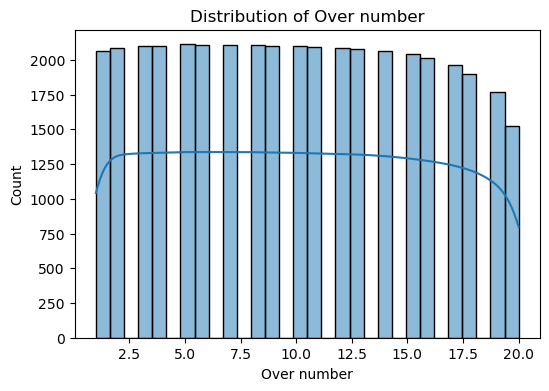

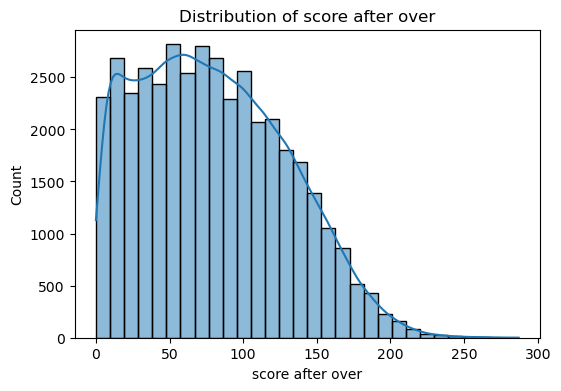

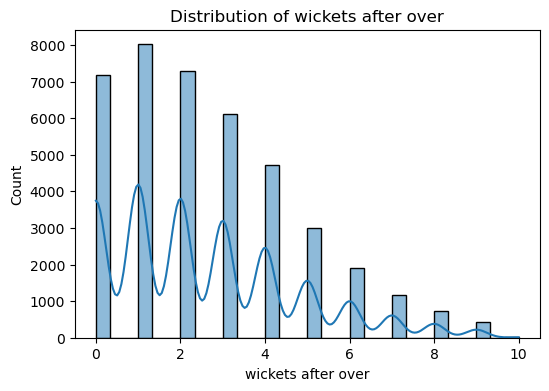

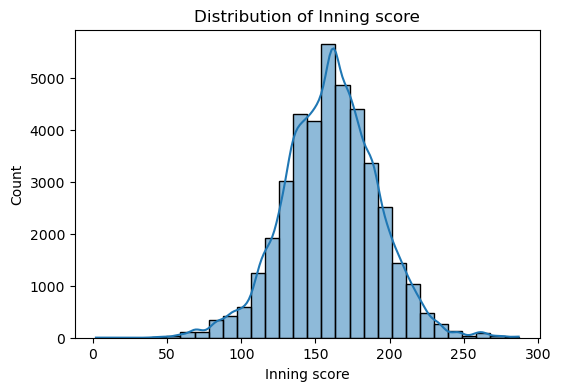

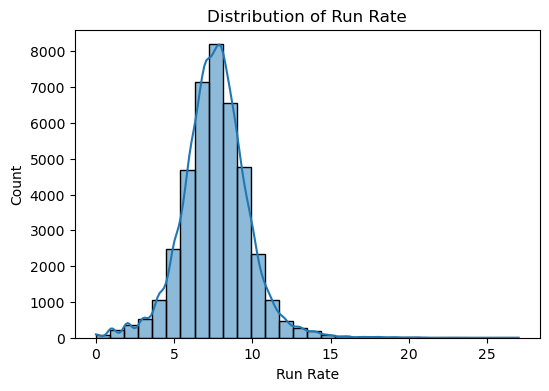

In [50]:
numerical_cols = ['Over number', 'score after over', 'wickets after over', 'Inning score', 'Run Rate']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(combined_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

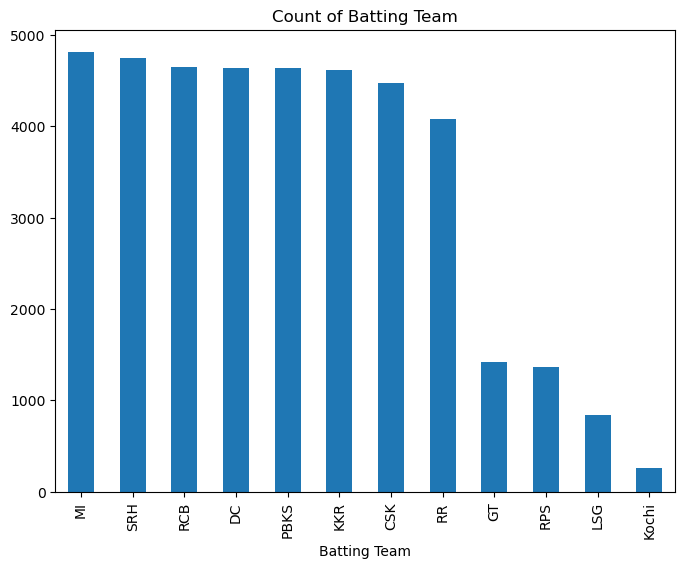

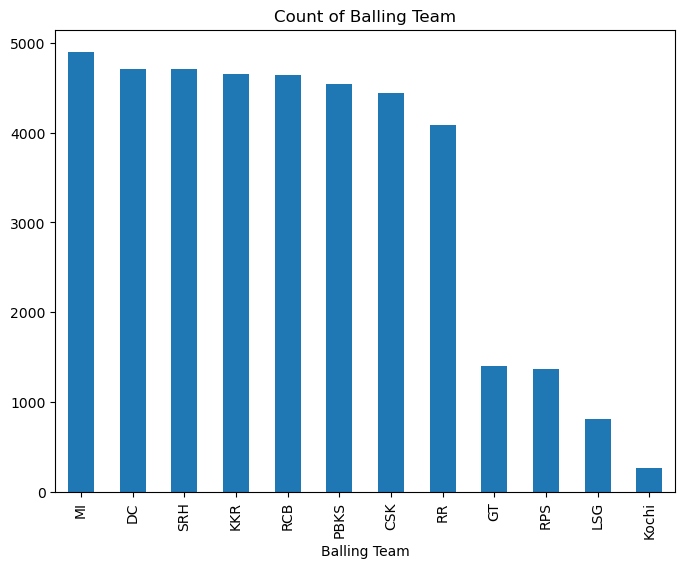

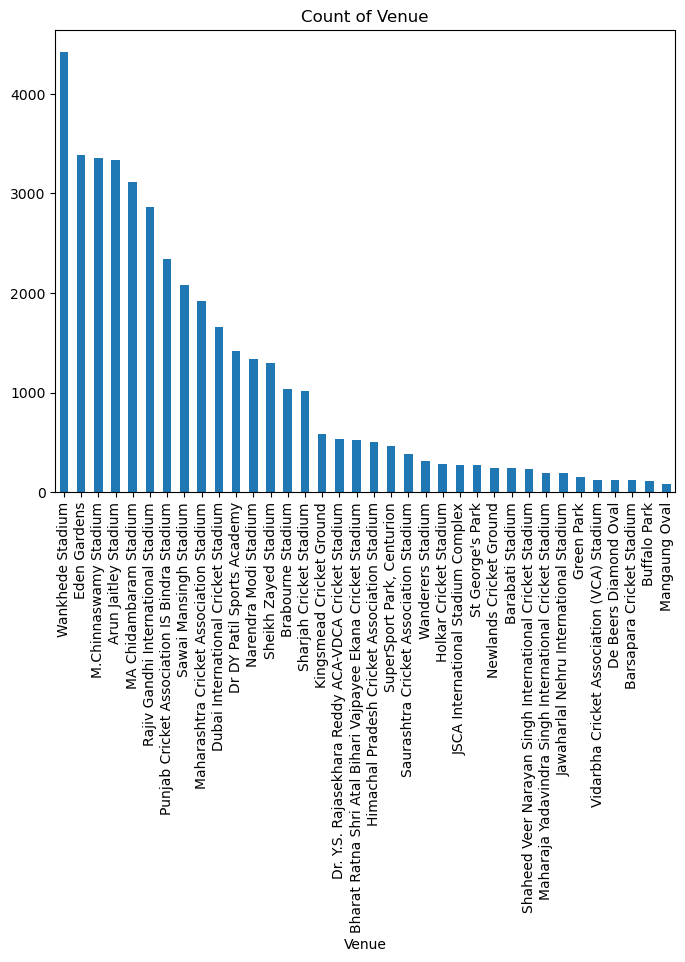

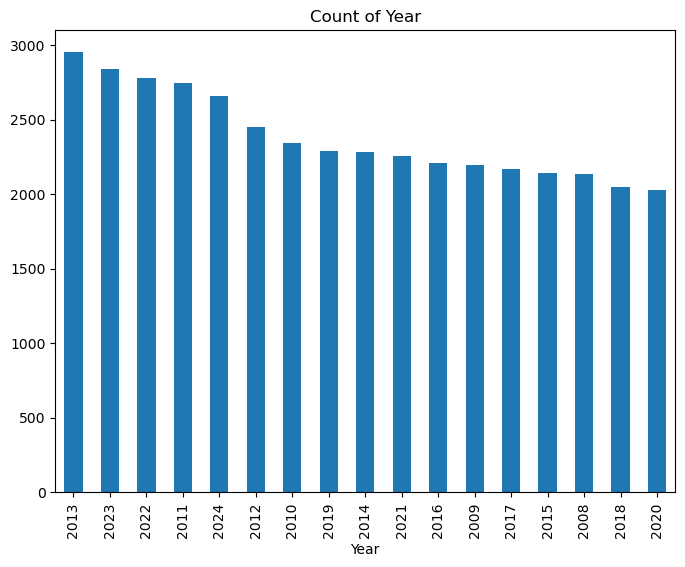

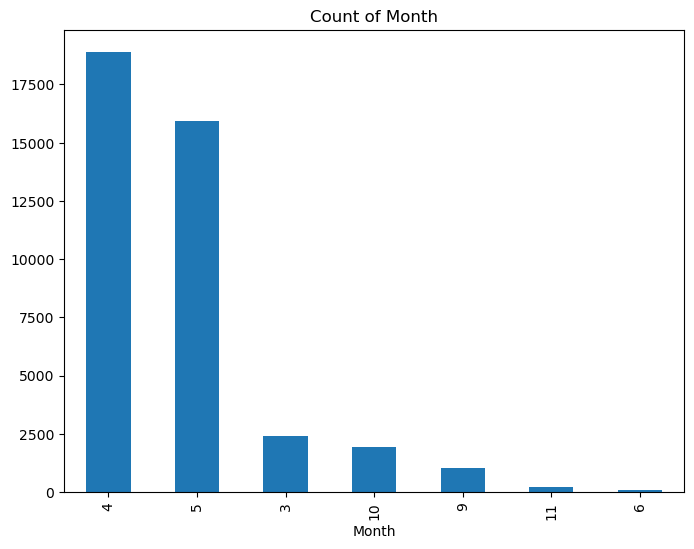

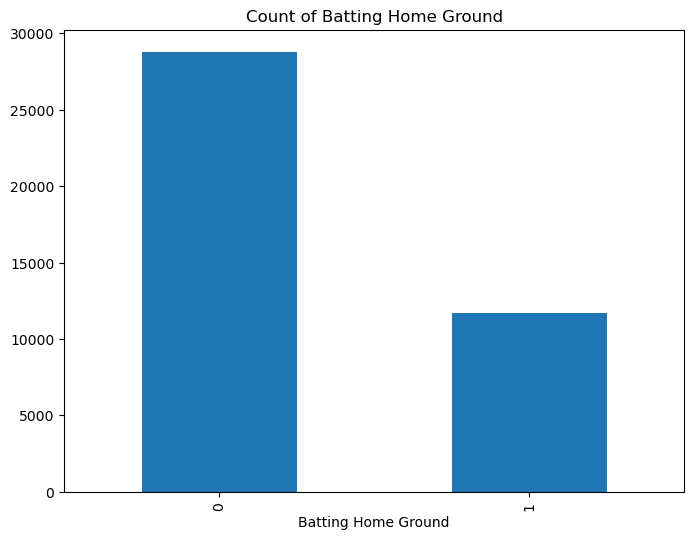

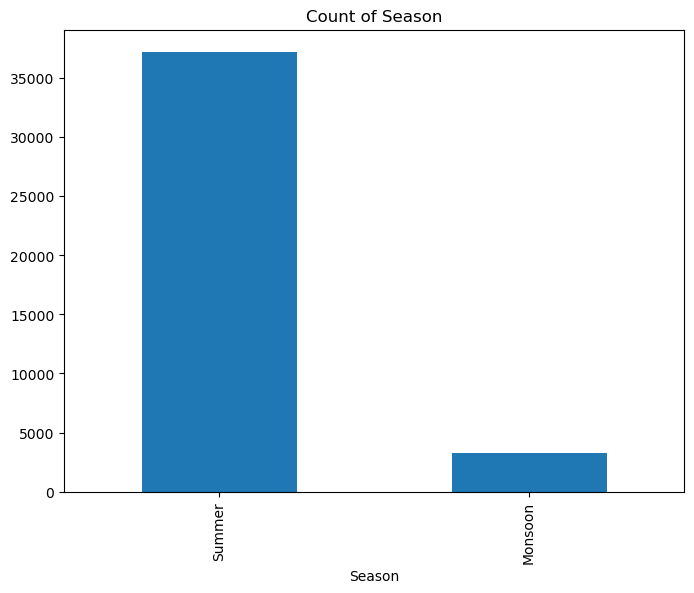

In [51]:
categorical_cols = ['Batting Team', 'Balling Team', 'Venue', 'Year', 'Month','Batting Home Ground','Season']
# categorical_cols = ['Batting Team', 'Balling Team', 'Venue']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    combined_df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.show()

In [52]:
# from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import LabelEncoder

# Train individual encoders for each categorical column
batting_team_encoder = LabelEncoder()
balling_team_encoder = LabelEncoder()
venue_encoder = LabelEncoder()
pitch_type_encoder = LabelEncoder()
season_encoder = LabelEncoder()

combined_df['Batting Team'] = batting_team_encoder.fit_transform(combined_df['Batting Team'])
combined_df['Balling Team'] = balling_team_encoder.fit_transform(combined_df['Balling Team'])
combined_df['Venue'] = venue_encoder.fit_transform(combined_df['Venue'])
combined_df['Pitch Type'] = pitch_type_encoder.fit_transform(combined_df['Pitch Type'])
combined_df['Season'] = season_encoder.fit_transform(combined_df['Season'])
# Save encoders individually
with open('batting_team_encoder.pkl', 'wb') as file:
    pickle.dump(batting_team_encoder, file)

with open('balling_team_encoder.pkl', 'wb') as file:
    pickle.dump(balling_team_encoder, file)

with open('venue_encoder.pkl', 'wb') as file:
    pickle.dump(venue_encoder, file)

with open('pitch_type_encoder.pkl', 'wb') as file:
    pickle.dump(pitch_type_encoder, file)

with open('season_econder.pkl','wb') as file:
    pickle.dump(season_encoder,file)



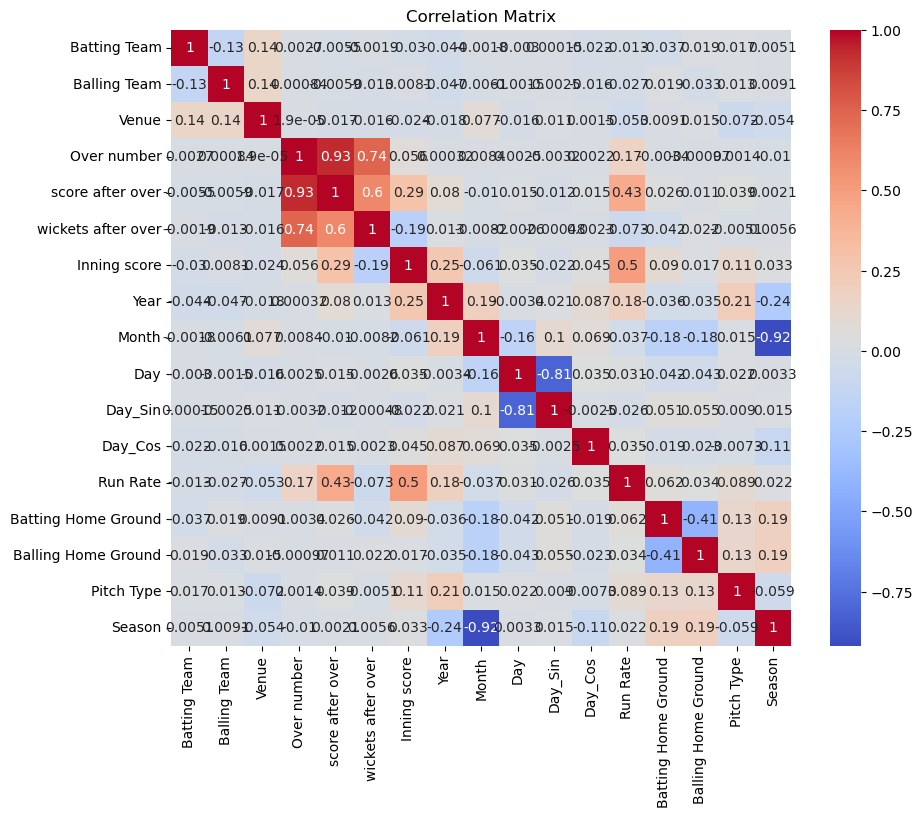

In [53]:
corr_matrix = combined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['Inning score'])
y = combined_df['Inning score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'SVR': SVR()
}

# Define function to evaluate models
def evaluate_models(X_train, y_train, X_test, y_test):
    results = {}

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        # Store results
        results[model_name] = {
            'RMSE': rmse,
            'MSE': mse,
            'R2 Score': r2,
            'MAE': mae
        }
    
    return results

# Evaluate models
results = evaluate_models(X_train, y_train, X_test, y_test)

# Print results for all models
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"R2 Score: {metrics['R2 Score']}")
    print(f"MAE: {metrics['MAE']}")
    print("-" * 50)


Linear Regression Performance:
RMSE: 23.314776903160144
MSE: 543.5788220441298
R2 Score: 0.4441847201994156
MAE: 17.2345415073725
--------------------------------------------------
Ridge Regression Performance:
RMSE: 23.314792266970134
MSE: 543.5795384519704
R2 Score: 0.44418398766457745
MAE: 17.234511212432633
--------------------------------------------------
Lasso Regression Performance:
RMSE: 23.3719389585486
MSE: 546.2475306821218
R2 Score: 0.4414559364827251
MAE: 17.229189165728627
--------------------------------------------------
Decision Tree Regressor Performance:
RMSE: 19.65845003093463
MSE: 386.45465761875386
R2 Score: 0.6048458936518893
MAE: 8.850462677359655
--------------------------------------------------
Random Forest Regressor Performance:
RMSE: 14.165024907252093
MSE: 200.64793062307217
R2 Score: 0.7948353004605885
MAE: 9.105457125231338
--------------------------------------------------
SVR Performance:
RMSE: 30.221002045698125
MSE: 913.3089646460903
R2 Score: 0.06

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluate model
rmse_ada = mean_squared_error(y_test, y_pred_ada, squared=False)
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)

# Print evaluation metrics
print("AdaBoost Regressor Performance:")
print(f"RMSE: {rmse_ada}")
print(f"MSE: {mse_ada}")
print(f"R2 Score: {r2_ada}")
print(f"MAE: {mae_ada}")
print("-" * 50)


AdaBoost Regressor Performance:
RMSE: 24.655022017426216
MSE: 607.8701106797715
R2 Score: 0.3784461757002364
MAE: 18.8027620000082
--------------------------------------------------


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate model
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting Regressor Performance:")
print(f"RMSE: {rmse_gb}")
print(f"MSE: {mse_gb}")
print(f"R2 Score: {r2_gb}")
print(f"MAE: {mae_gb}")
print("-" * 50)


Gradient Boosting Regressor Performance:
RMSE: 22.12709479723378
MSE: 489.6083241657703
R2 Score: 0.49937014347700215
MAE: 16.289671136596745
--------------------------------------------------


In [60]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print evaluation metrics
print("XGBoost Regressor Performance:")
print(f"RMSE: {rmse_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")
print(f"MAE: {mae_xgb}")
print("-" * 50)


XGBoost Regressor Performance:
RMSE: 12.37163713817481
MSE: 153.0574054786662
R2 Score: 0.8434971570968628
MAE: 8.728907874246794
--------------------------------------------------


In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter space
param_dist = {
    'learning_rate': np.linspace(0.01, 0.3, 5),  # 0.01 to 0.3 in 5 steps
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 300, 500, 700],
    'gamma': [0, 0.1, 0.3, 0.5, 1.0],
    'reg_lambda': [0.01, 0.1, 1, 10],  # L2 Regularization
    'reg_alpha': [0.01, 0.1, 1, 10]   # L1 Regularization
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # Number of random combinations to test
    scoring='r2',
    cv=5,  # 5-fold cross-validation
    verbose=3,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

# Use the best model
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 700, 'max_depth': 9, 'learning_rate': 0.08249999999999999, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best R2 Score: 0.932990312576294


In [62]:
y_pred_best = best_xgb.predict(X_test)

In [63]:
y_pred_best

array([250.70918, 143.73494, 215.12422, ..., 185.4352 , 168.20998,
       163.9556 ], dtype=float32)

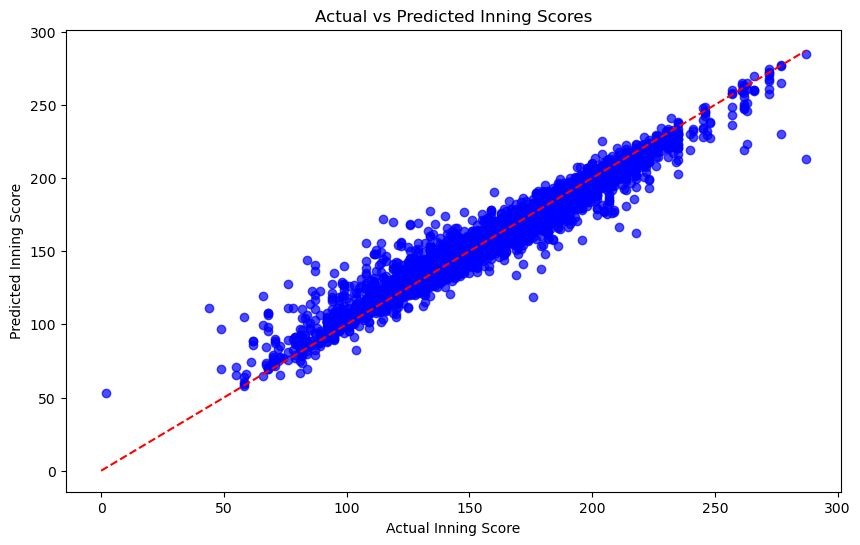

In [64]:
#visualize prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Inning Score')
plt.ylabel('Predicted Inning Score')
plt.title('Actual vs Predicted Inning Scores')
plt.show()

In [65]:
# Save the best model in a pickle file
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

[CV 1/5] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.22749999999999998, max_depth=3, n_estimators=700, reg_alpha=0.01, reg_lambda=0.1, subsample=0.6;, score=0.672 total time=   7.6s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=1.0;, score=0.525 total time=   0.6s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=50, reg_alpha=0.1, reg_lambda=1, subsample=1.0;, score=0.516 total time=   0.9s
[CV 3/5] END colsample_bytree=0.8, gamma=1.0, learning_rate=0.01, max_depth=9, n_estimators=500, reg_alpha=0.1, reg_lambda=10, subsample=0.8;, score=0.729 total time=  12.2s
[CV 1/5] END colsample_bytree=1.0, gamma=1.0, learning_rate=0.155, max_depth=11, n_estimators=300, reg_alpha=10, reg_lambda=1, subsample=0.6;, score=0.903 total time=  15.1s
[CV 4/5] END colsample_bytree=1.0, gamma=1.0, learning_rate=0.155, max_depth=11, n_estimators=300, reg_alpha=10, reg_la

In [59]:
pip install xgboost


  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.25.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (201.4 MB)
Note: you may need to restart the kernel to use updated packages.
